<a href="https://colab.research.google.com/github/ravi260372/Data_Science_Python/blob/main/Profiling_Absenteeism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TEAM DATA JUNKIES : Souvik , Sreekanth , Deepak , Ravi**  
**20th MARCH 2021...BA08**

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load datafile in workspace
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Absenteeism.csv to Absenteeism.csv
User uploaded file "Absenteeism.csv" with length 46712 bytes


In [3]:
# load the data into a dataframe and inspect a few rows
df = pd.read_csv("Absenteeism.csv" , header = 0, delimiter = ",") ## 1st row is the header and data is "comma separated"
df.sample(5).T

,5,252,216,521,225
ID,3,11,31,9,3
Reason for absence,23,19,0,1,11
Month of absence,7,8,5,10,6
Day of the week,6,6,4,4,2
Seasons,1,1,3,4,3
Transportation expense,179,289,388,228,179
Distance from Residence to Work,51,36,15,14,51
Service time,18,13,9,16,18
Age,38,33,50,58,38
Work load Average/day,"239,554","265,615","378,884","284,853","377,550"


In [5]:
# cleaning column name
df.columns = df.columns.str.replace('/', 'per').str.strip()
df['Work load Averageperday'] = df['Work load Averageperday'].str.replace(",","").astype(float)
df.sample(1).T

,395
ID,1.0
Reason for absence,22.0
Month of absence,3.0
Day of the week,2.0
Seasons,2.0
Transportation expense,235.0
Distance from Residence to Work,11.0
Service time,14.0
Age,37.0
Work load Averageperday,244387.0


In [6]:
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(df.isnull().sum()/len(df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,UniqueVal,MissingVal,Percent Missing,Count
ID,int64,36,0,0.0,740
Reason for absence,int64,28,0,0.0,740
Month of absence,int64,13,0,0.0,740
Day of the week,int64,5,0,0.0,740
Seasons,int64,4,0,0.0,740
Transportation expense,int64,24,0,0.0,740
Distance from Residence to Work,int64,25,0,0.0,740
Service time,int64,18,0,0.0,740
Age,int64,22,0,0.0,740
Work load Averageperday,float64,38,0,0.0,740


In [9]:
# create a dataframe of pure numeric columns
data_num = df[['ID','Transportation expense' ,'Distance from Residence to Work' , 'Service time', 'Age', 'Work load Averageperday' , 'Hit target' , 
               'Weight', 'Height', 'Body mass index' , 'Absenteeism time in hours']]
data_num.sample(2).T

,675,558
ID,29.0,22.0
Transportation expense,225.0,179.0
Distance from Residence to Work,15.0,26.0
Service time,15.0,9.0
Age,41.0,30.0
Work load Averageperday,237656.0,280549.0
Hit target,99.0,98.0
Weight,94.0,56.0
Height,182.0,171.0
Body mass index,28.0,19.0


In [12]:
# aggregate information by retailer over median volume , disp and price
df_pivot = pd.pivot_table(data_num , values = ['Transportation expense' ,'Distance from Residence to Work' , 'Service time', 'Age', 'Work load Averageperday' , 'Hit target' , 
               'Weight', 'Height', 'Body mass index' , 'Absenteeism time in hours'] , index = 'ID' , aggfunc=np.median)
df_pivot.sample(5).T

ID,32,15,29,22,34
Absenteeism time in hours,2.0,3.0,3.0,2.0,3.0
Age,49.0,40.0,41.0,30.0,37.0
Body mass index,36.0,25.0,28.0,19.0,28.0
Distance from Residence to Work,48.0,31.0,15.0,26.0,10.0
Height,172.0,171.0,182.0,171.0,172.0
Hit target,91.0,93.0,99.0,96.0,95.0
Service time,29.0,12.0,15.0,9.0,10.0
Transportation expense,289.0,291.0,225.0,179.0,118.0
Weight,108.0,73.0,94.0,56.0,83.0
Work load Averageperday,284853.0,280549.0,237656.0,264249.0,268519.0


In [13]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Absenteeism time in hours        36 non-null     float64
 1   Age                              36 non-null     int64  
 2   Body mass index                  36 non-null     int64  
 3   Distance from Residence to Work  36 non-null     int64  
 4   Height                           36 non-null     int64  
 5   Hit target                       36 non-null     float64
 6   Service time                     36 non-null     int64  
 7   Transportation expense           36 non-null     int64  
 8   Weight                           36 non-null     int64  
 9   Work load Averageperday          36 non-null     float64
dtypes: float64(3), int64(7)
memory usage: 3.1 KB


In [15]:
# scale the variables
from sklearn.preprocessing import MinMaxScaler
scld = MinMaxScaler(feature_range = (0,1))
arr_scld = scld.fit_transform(df_pivot)
df_scld = pd.DataFrame(arr_scld , columns = df_pivot.columns)
print(df_scld.shape)
df_scld.head().T

(36, 10)


,0,1,2,3,4
Absenteeism time in hours,0.500000,0.562500,0.375000,0.000000,1.000000
Age,0.322581,0.677419,0.354839,0.419355,0.516129
Body mass index,0.526316,0.736842,0.631579,0.789474,1.000000
Distance from Residence to Work,0.127660,0.510638,0.978723,0.191489,0.319149
Height,0.272727,0.000000,0.212121,0.212121,0.121212
Hit target,0.636364,0.363636,0.727273,0.636364,0.454545
Service time,0.464286,0.392857,0.607143,0.428571,0.428571
Transportation expense,0.433333,0.433333,0.225926,0.000000,0.433333
Weight,0.615385,0.615385,0.634615,0.807692,0.961538
Work load Averageperday,0.331735,0.000000,0.370128,0.555959,0.491043


In [16]:
# building the clusters
from sklearn.cluster import KMeans
num_of_clusters = range(2,10)
error = []
 
for num_clusters in num_of_clusters:
  clusters = KMeans(num_clusters)
  clusters.fit(df_scld)
  error.append(clusters.inertia_/100)
 
ndf = pd.DataFrame({"Cluster_Number":num_of_clusters, "Error_Term": error})
ndf

,Cluster_Number,Error_Term
0,2,0.177918
1,3,0.144686
2,4,0.128027
3,5,0.113126
4,6,0.105133
5,7,0.095438
6,8,0.087249
7,9,0.081662


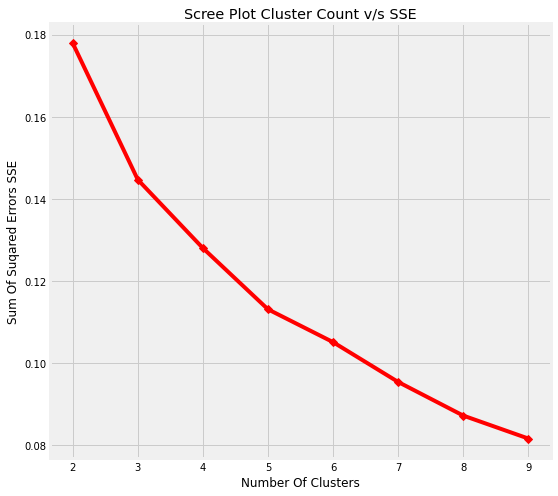

In [18]:
# plot the clusters and errors
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.plot(ndf.Cluster_Number , ndf.Error_Term , marker = "D" , color = 'red')
plt.xlabel("Number Of Clusters")
plt.ylabel("Sum Of Suqared Errors SSE")
plt.title("Scree Plot Cluster Count v/s SSE")
plt.show();

In [19]:
# build 5 clusters  
clust_final = KMeans(5)
clust_final.fit(df_scld)
clust_final.labels_

array([2, 0, 0, 2, 0, 4, 1, 0, 3, 4, 4, 1, 4, 2, 1, 3, 1, 4, 1, 1, 4, 1,
       4, 3, 1, 4, 1, 1, 2, 1, 3, 0, 0, 2, 1, 2], dtype=int32)

In [21]:
# add the cluster labels to the original data
df_pivot['Cluster']=clust_final.labels_
print(clust_final.labels_)
df_pivot.head(10).T

[2 0 0 2 0 4 1 0 3 4 4 1 4 2 1 3 1 4 1 1 4 1 4 3 1 4 1 1 2 1 3 0 0 2 1 2]


ID,1,2,3,4,5,6,7,8,9,10
Absenteeism time in hours,4.0,4.5,3.0,0.0,8.0,8.0,3.0,0.0,8.0,8.0
Age,37.0,48.0,38.0,40.0,43.0,33.0,39.0,39.0,58.0,28.0
Body mass index,29.0,33.0,31.0,34.0,38.0,25.0,24.0,35.0,22.0,27.0
Distance from Residence to Work,11.0,29.0,51.0,14.0,20.0,29.0,5.0,35.0,14.0,52.0
Height,172.0,163.0,170.0,170.0,167.0,167.0,168.0,170.0,172.0,172.0
Hit target,95.0,92.0,96.0,95.0,93.0,94.5,95.0,88.0,96.5,93.0
Service time,14.0,12.0,18.0,13.0,13.0,13.0,14.0,14.0,16.0,3.0
Transportation expense,235.0,235.0,179.0,118.0,235.0,189.0,279.0,231.0,228.0,361.0
Weight,88.0,88.0,89.0,98.0,106.0,69.0,68.0,100.0,65.0,80.0
Work load Averageperday,249797.0,218103.5,253465.0,271219.0,265017.0,274728.5,313642.0,282718.0,255339.0,257385.5


In [24]:
# cluster profiling
cluster_profile = pd.pivot_table(df_pivot , values = ['Transportation expense' ,'Distance from Residence to Work' , 'Service time', 'Age', 'Work load Averageperday' , 'Hit target' , 
               'Weight', 'Height', 'Body mass index' , 'Absenteeism time in hours'] , index = 'Cluster' , aggfunc=np.median)
np.round(cluster_profile).T

Cluster,0,1,2,3,4
Absenteeism time in hours,2.0,3.0,3.0,8.0,8.0
Age,45.0,32.0,38.0,48.0,33.0
Body mass index,34.0,23.0,28.0,24.0,25.0
Distance from Residence to Work,32.0,29.0,12.0,15.0,28.0
Height,168.0,170.0,175.0,174.0,173.0
Hit target,92.0,95.0,95.0,97.0,94.0
Service time,14.0,10.0,14.0,16.0,12.0
Transportation expense,235.0,229.0,136.0,237.0,315.0
Weight,94.0,68.0,94.0,71.0,78.0
Work load Averageperday,264010.0,273744.0,263075.0,256485.0,264960.0


In [25]:
# howmany stores per cluster
df_pivot.groupby("Cluster").size()

Cluster
0     6
1    12
2     6
3     4
4     8
dtype: int64

In [26]:
# build 4 clusters  
clust_4 = KMeans(4)
clust_4.fit(df_scld)
clust_4.labels_

array([3, 1, 1, 1, 1, 2, 3, 1, 3, 2, 2, 0, 2, 3, 0, 3, 3, 2, 0, 0, 2, 0,
       2, 2, 3, 2, 0, 0, 3, 0, 2, 1, 1, 3, 0, 1], dtype=int32)

In [27]:
# add the cluster labels to the original data
df_pivot['Cluster4']=clust_4.labels_
print(clust_4.labels_)
df_pivot.head(10).T

[3 1 1 1 1 2 3 1 3 2 2 0 2 3 0 3 3 2 0 0 2 0 2 2 3 2 0 0 3 0 2 1 1 3 0 1]


ID,1,2,3,4,5,6,7,8,9,10
Absenteeism time in hours,4.0,4.5,3.0,0.0,8.0,8.0,3.0,0.0,8.0,8.0
Age,37.0,48.0,38.0,40.0,43.0,33.0,39.0,39.0,58.0,28.0
Body mass index,29.0,33.0,31.0,34.0,38.0,25.0,24.0,35.0,22.0,27.0
Distance from Residence to Work,11.0,29.0,51.0,14.0,20.0,29.0,5.0,35.0,14.0,52.0
Height,172.0,163.0,170.0,170.0,167.0,167.0,168.0,170.0,172.0,172.0
Hit target,95.0,92.0,96.0,95.0,93.0,94.5,95.0,88.0,96.5,93.0
Service time,14.0,12.0,18.0,13.0,13.0,13.0,14.0,14.0,16.0,3.0
Transportation expense,235.0,235.0,179.0,118.0,235.0,189.0,279.0,231.0,228.0,361.0
Weight,88.0,88.0,89.0,98.0,106.0,69.0,68.0,100.0,65.0,80.0
Work load Averageperday,249797.0,218103.5,253465.0,271219.0,265017.0,274728.5,313642.0,282718.0,255339.0,257385.5


In [28]:
# howmany stores per cluster
df_pivot.groupby("Cluster4").size()

Cluster4
0     9
1     8
2    10
3     9
dtype: int64

In [29]:
# cluster profiling
cluster_profile_4 = pd.pivot_table(df_pivot , values = ['Transportation expense' ,'Distance from Residence to Work' , 'Service time', 'Age', 'Work load Averageperday' , 'Hit target' , 
               'Weight', 'Height', 'Body mass index' , 'Absenteeism time in hours'] , index = 'Cluster4' , aggfunc=np.median)
np.round(cluster_profile_4).T

Cluster4,0,1,2,3
Absenteeism time in hours,2.0,2.0,8.0,3.0
Age,31.0,45.0,33.0,39.0
Body mass index,23.0,34.0,25.0,25.0
Distance from Residence to Work,42.0,27.0,26.0,14.0
Height,171.0,170.0,173.0,172.0
Hit target,95.0,94.0,94.0,96.0
Service time,9.0,14.0,12.0,14.0
Transportation expense,225.0,233.0,315.0,225.0
Weight,68.0,98.0,76.0,75.0
Work load Averageperday,275089.0,264010.0,264960.0,255339.0


In [30]:
# build 3 clusters  
clust_3 = KMeans(3)
clust_3.fit(df_scld)
clust_3.labels_

array([2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2], dtype=int32)

In [31]:
# add the cluster labels to the original data
df_pivot['Cluster3']=clust_3.labels_
print(clust_3.labels_)
df_pivot.head(5).T

[2 2 2 2 2 1 0 2 1 1 1 0 1 2 0 1 0 1 0 0 1 0 1 1 0 1 0 0 2 0 1 2 2 2 2 2]


ID,1,2,3,4,5
Absenteeism time in hours,4.0,4.5,3.0,0.0,8.0
Age,37.0,48.0,38.0,40.0,43.0
Body mass index,29.0,33.0,31.0,34.0,38.0
Distance from Residence to Work,11.0,29.0,51.0,14.0,20.0
Height,172.0,163.0,170.0,170.0,167.0
Hit target,95.0,92.0,96.0,95.0,93.0
Service time,14.0,12.0,18.0,13.0,13.0
Transportation expense,235.0,235.0,179.0,118.0,235.0
Weight,88.0,88.0,89.0,98.0,106.0
Work load Averageperday,249797.0,218103.5,253465.0,271219.0,265017.0


In [32]:
# howmany stores per cluster
df_pivot.groupby("Cluster3").size()

Cluster3
0    11
1    12
2    13
dtype: int64

In [33]:
# cluster profiling
cluster_profile_3 = pd.pivot_table(df_pivot , values = ['Transportation expense' ,'Distance from Residence to Work' , 'Service time', 'Age', 'Work load Averageperday' , 'Hit target' , 
               'Weight', 'Height', 'Body mass index' , 'Absenteeism time in hours'] , index = 'Cluster3' , aggfunc=np.median)
np.round(cluster_profile_3).T

Cluster3,0,1,2
Absenteeism time in hours,3.0,8.0,3.0
Age,32.0,34.0,41.0
Body mass index,23.0,25.0,31.0
Distance from Residence to Work,27.0,21.0,20.0
Height,170.0,173.0,172.0
Hit target,95.0,95.0,95.0
Service time,9.0,12.0,14.0
Transportation expense,233.0,294.0,225.0
Weight,68.0,76.0,94.0
Work load Averageperday,275089.0,262921.0,265017.0


**Cluster 0 : Healthy Juniors who live farthest and are heavily loaded (Exploited Labor Class)**   
**Cluster 1 : Mid-Career Professionals who can afford transportation with lowest work load (Babus)**  
**Cluster 2 : Most Experienced who live realtively closer with medium workload and are Obese (Managers)** 